To do: add forecasts and multivariate or copula, but this seems to work perfectly

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
prev_path = "\\".join(list(os.getcwd().split('\\')[0:-1]))
if module_path not in sys.path: sys.path.append(prev_path)

from models.stat_models.garch import Garch
import warnings
warnings.filterwarnings('ignore')

In [2]:
mod = Garch()

Test vs generated data

Optimization terminated successfully.
         Current function value: 1.405706
         Iterations: 28
         Function evaluations: 116
         Gradient evaluations: 29
parameters:
w :0.07400094486952724
a :0.05881278546315845
b :0.8672319942635804


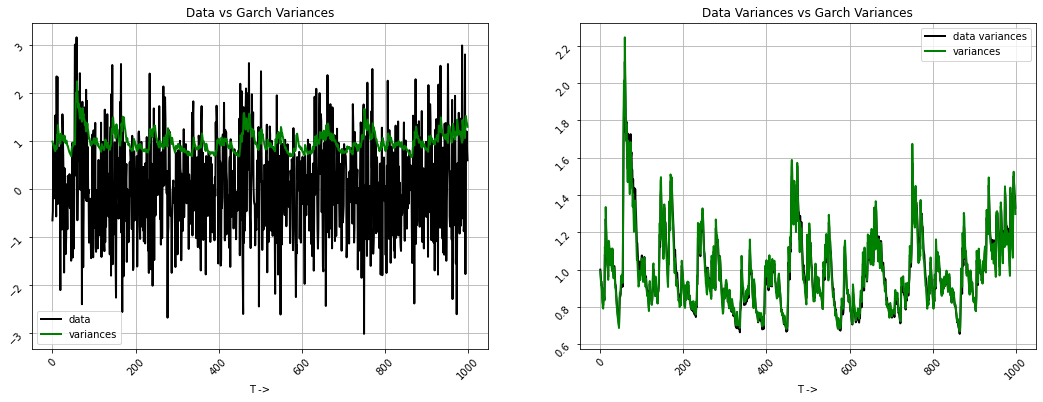

In [3]:
mod.test_model_vs_generated_data(n=1000, w=0.05, a=0.05, b=0.9, s2=1)
x = mod.data

get data

In [4]:
#import eikon as ek
# I tried ok :S

df = pd.read_csv(os.path.join(prev_path, "models", "data", 'snp.csv'), index_col=0)
df_returns = np.log(df).diff()
df_returns = df_returns[1:]
df_returns.index = [dt.datetime.strptime(str(x).split(" ")[0], "%Y-%m-%d").date() for x in list(df_returns.index)]
snp = np.array(df_returns["^GSPC"])


In [5]:
mod = Garch()
mod.estimate_model(data=snp)

Optimization terminated successfully.
         Current function value: -3.267868
         Iterations: 25
         Function evaluations: 132
         Gradient evaluations: 33


parameters:
w :3.2119319056905293e-06
a :0.20299783126981702
b :0.7862767514213235


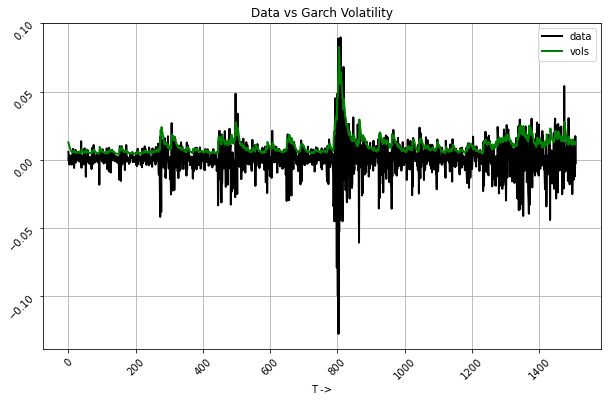

In [6]:
mod.plot_in_sample()

In [7]:
mod.compute_standard_errors()

array([6.51828265e-07, 2.72061159e-02, 2.43922869e-02])

In [8]:
mod.t_tests(robust=False)

,bot quantile:,top quantile:,Results
0,0.000002,0.000004,Significant
1,0.149675,0.256321,Significant
2,0.738469,0.834085,Significant
